In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load the ERA5 dataset
ds = xr.open_dataset('ERA5_2mTemp_19900101-19900531_00h.nc')

#look at the dataset
ds



<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 151)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    expver     int32 ...
  * time       (time) datetime64[ns] 1990-01-01 1990-01-02 ... 1990-05-31
Data variables:
    t2m        (time, latitude, longitude) float32 ...

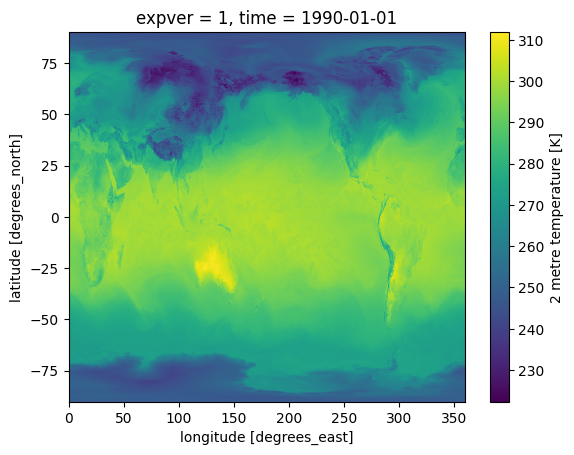

In [6]:
# (a) Plot the temperature on January 1, 1990 on a map
# use sel to choose the day (label-based indexing)
temp_jan1_1990 = ds.sel(time='1990-01-01')
temp_jan1_1990
# plot the temp of the day 
temp_jan1_1990['t2m'].plot()





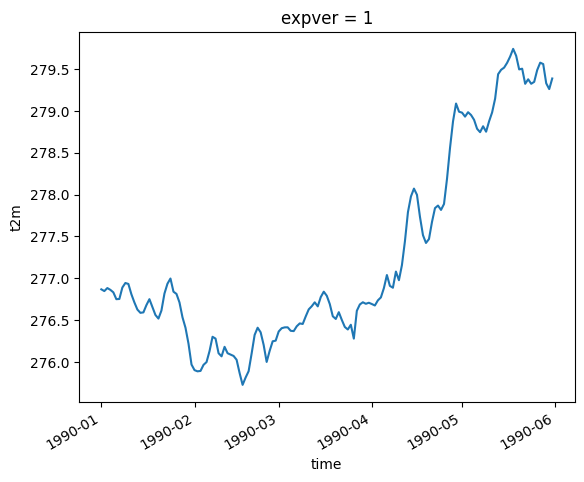

In [11]:
# (b) Calculate daily mean global temperature and plot the time series
# calculates daily mean temp in the whole world 
daily_mean_temp = ds['t2m'].mean(dim=['latitude', 'longitude'])
# plots the results 
daily_mean_temp.plot()



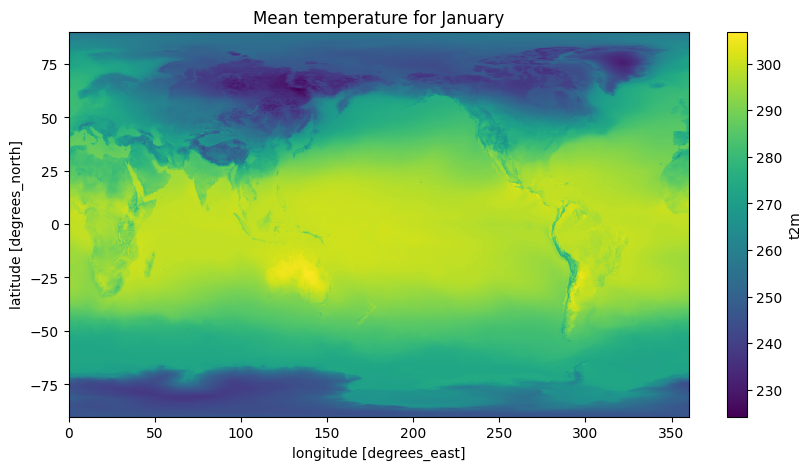

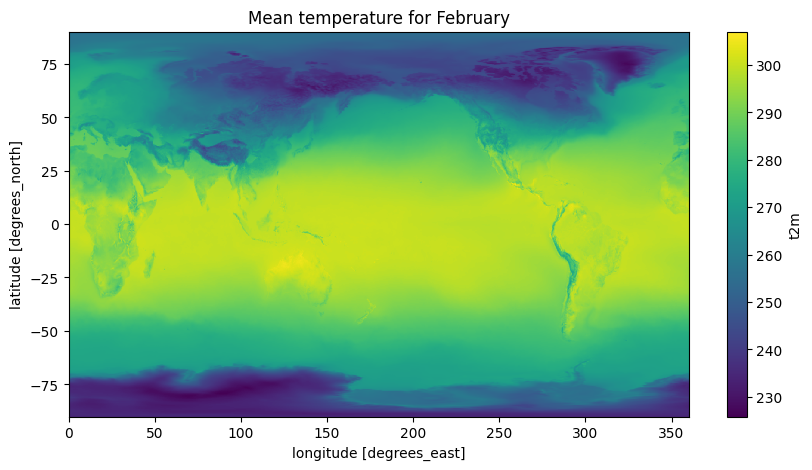

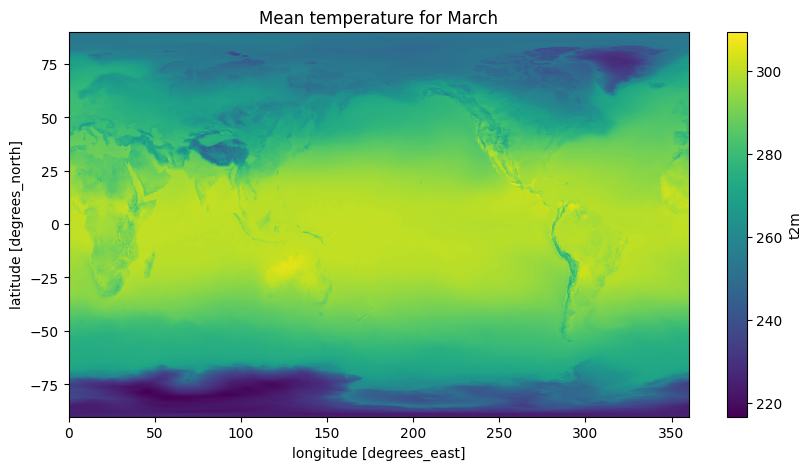

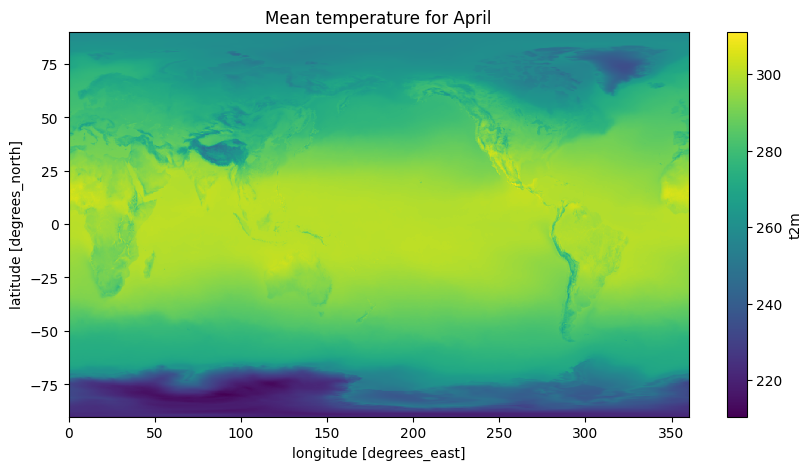

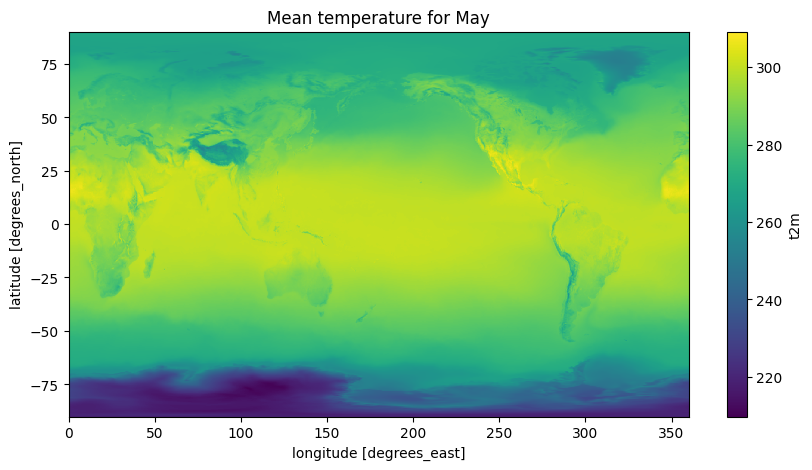

In [17]:
# (c) Calculate the mean temperature for each month (January-May) and plot the data on (five) global maps
# resample the dataset to monthly frequency and calculate average temp 
# ds - original file that we uploeaded 

monthly_mean_temp = ds['t2m'].resample(time='M').mean()
# dataset only has the temp of 5 months

# list with the month names for the plots
months = ['January', 'February', 'March', 'April', 'May']

# loop for the graphs 
for i, month in enumerate(months):
    #the size of the plot 
    plt.figure(figsize=(10, 5))
    monthly_mean_temp.sel(time=monthly_mean_temp['time.month'] == i + 1).mean(dim='time').plot()
    plt.title(f'Mean temperature for {month}')
    plt.show()


NameError: name 'monthly_mean_temp' is not defined